<a href="https://colab.research.google.com/github/Krishnan-Raghavan/Packt/blob/main/DataCleaningAnd_PreparationChapter10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Essential Libraries

In [1]:
!pip install scikit-learn==1.5.0
!Pip install matplotlib==3.9.0
!Pip install seaborn==0.13.2
!Pip install category_encoders==2.6.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 30.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
/bin/bash: line 1: Pip: command not found
/bin/bash: line 1: Pip: command not found
/bin/bash: line 1: Pip: command not found


Label Encoding

Original DataFrame:
  Employee Rating  Salary  Years of Experience Department
0            Poor   35000                    2         HR
1            Good   50000                    5         IT
2    Satisfactory   42000                    3    Finance
3       Excellent   60000                    8         IT
4            Good   52000                    6  Marketing

DataFrame after Label Encoding:
  Employee Rating  Salary  Years of Experience Department  \
0            Poor   35000                    2         HR   
1            Good   50000                    5         IT   
2    Satisfactory   42000                    3    Finance   
3       Excellent   60000                    8         IT   
4            Good   52000                    6  Marketing   

   Employee Rating (Encoded)  
0                          2  
1                          1  
2                          3  
3                          0  
4                          1  


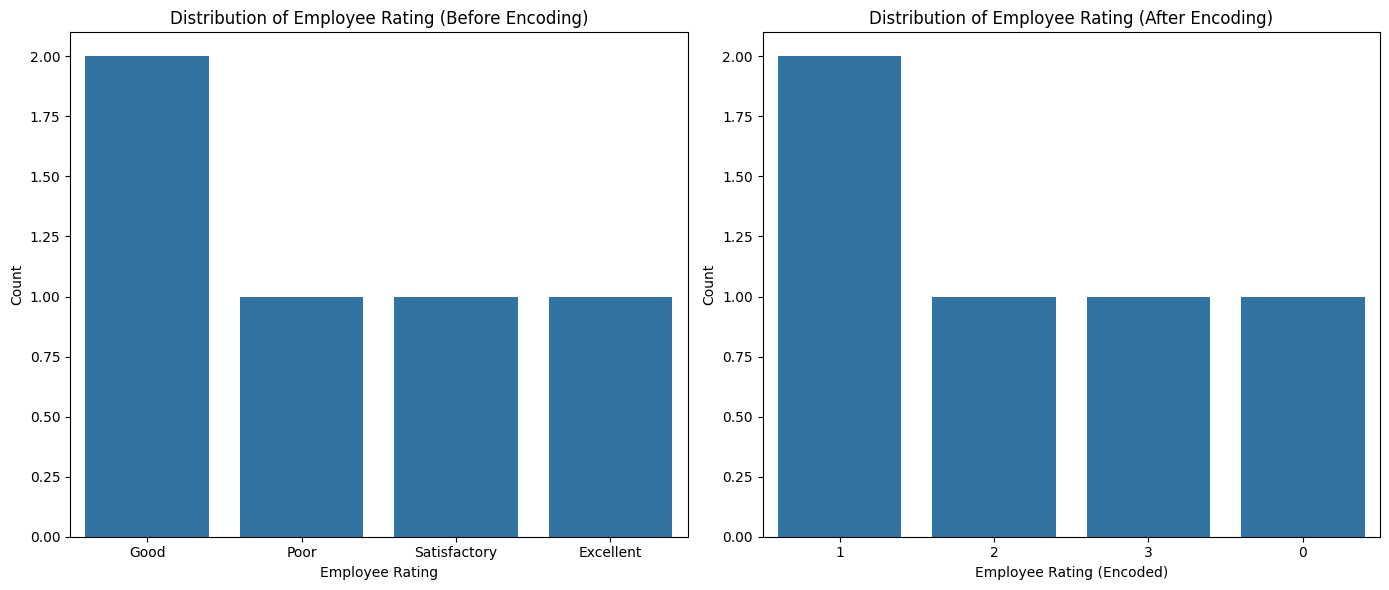

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'Employee Rating': ['Poor', 'Good', 'Satisfactory', 'Excellent', 'Good'],
    'Salary': [35000, 50000, 42000, 60000, 52000],
    'Years of Experience': [2, 5, 3, 8, 6],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'Marketing']
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Employee Rating' column
df['Employee Rating (Encoded)'] = label_encoder.fit_transform(df['Employee Rating'])

print("\nDataFrame after Label Encoding:")
print(df)

# Plot the distribution of the 'Employee Rating' column before encoding
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Employee Rating', data=df, order=df['Employee Rating'].value_counts().index)
plt.title('Distribution of Employee Rating (Before Encoding)')
plt.xlabel('Employee Rating')
plt.ylabel('Count')

# Plot the distribution of the 'Employee Rating (Encoded)' column after encoding
plt.subplot(1, 2, 2)
sns.countplot(x='Employee Rating (Encoded)', data=df, order=df['Employee Rating (Encoded)'].value_counts().index)
plt.title('Distribution of Employee Rating (After Encoding)')
plt.xlabel('Employee Rating (Encoded)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Forced Label Encoding

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample dataset
data = {
    'Employee Rating': ['Poor', 'Good', 'Satisfactory', 'Excellent', 'Good'],
    'Salary': [35000, 50000, 42000, 60000, 52000],
    'Years of Experience': [2, 5, 3, 8, 6],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'Marketing']
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Define the correct order of categories with prefixes
ordered_categories = {
    'Poor': '1.Poor',
    'Satisfactory': '2.Satisfactory',
    'Good': '3.Good',
    'Excellent': '4.Excellent'
}

# Map the 'Employee Rating' column to the prefixed categories
df['Employee Rating Ordered'] = df['Employee Rating'].map(ordered_categories)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Employee Rating Ordered' column
df['Employee Rating (Encoded)'] = label_encoder.fit_transform(df['Employee Rating Ordered'])

# Reverse the mapping for clarity in the DataFrame (optional)
reverse_mapping = {v: k for k, v in ordered_categories.items()}
df['Employee Rating Ordered'] = df['Employee Rating Ordered'].map(reverse_mapping)

print("\nDataFrame after Label Encoding with Correct Order:")
print(df[['Employee Rating Ordered','Employee Rating (Encoded)']])

Original DataFrame:
  Employee Rating  Salary  Years of Experience Department
0            Poor   35000                    2         HR
1            Good   50000                    5         IT
2    Satisfactory   42000                    3    Finance
3       Excellent   60000                    8         IT
4            Good   52000                    6  Marketing

DataFrame after Label Encoding with Correct Order:
  Employee Rating Ordered  Employee Rating (Encoded)
0                    Poor                          0
1                    Good                          2
2            Satisfactory                          1
3               Excellent                          3
4                    Good                          2


One-Hot Encoding

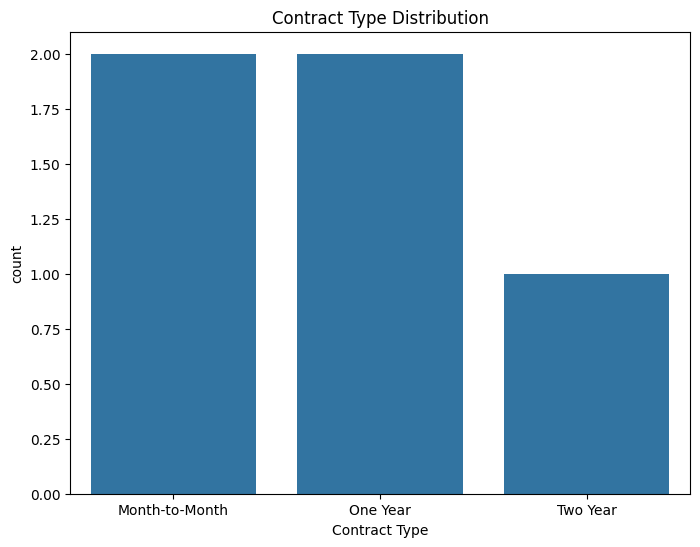

   Customer ID     Internet Service    Payment Method  \
0            1                  DSL  Electronic Check   
1            2          Fiber Optic      Mailed Check   
2            3                  DSL     Bank Transfer   
3            4          Fiber Optic       Credit Card   
4            5  No Internet Service  Electronic Check   

   Contract Type_Month-to-Month  Contract Type_One Year  \
0                           1.0                     0.0   
1                           0.0                     1.0   
2                           1.0                     0.0   
3                           0.0                     0.0   
4                           0.0                     1.0   

   Contract Type_Two Year  
0                     0.0  
1                     0.0  
2                     0.0  
3                     1.0  
4                     0.0  


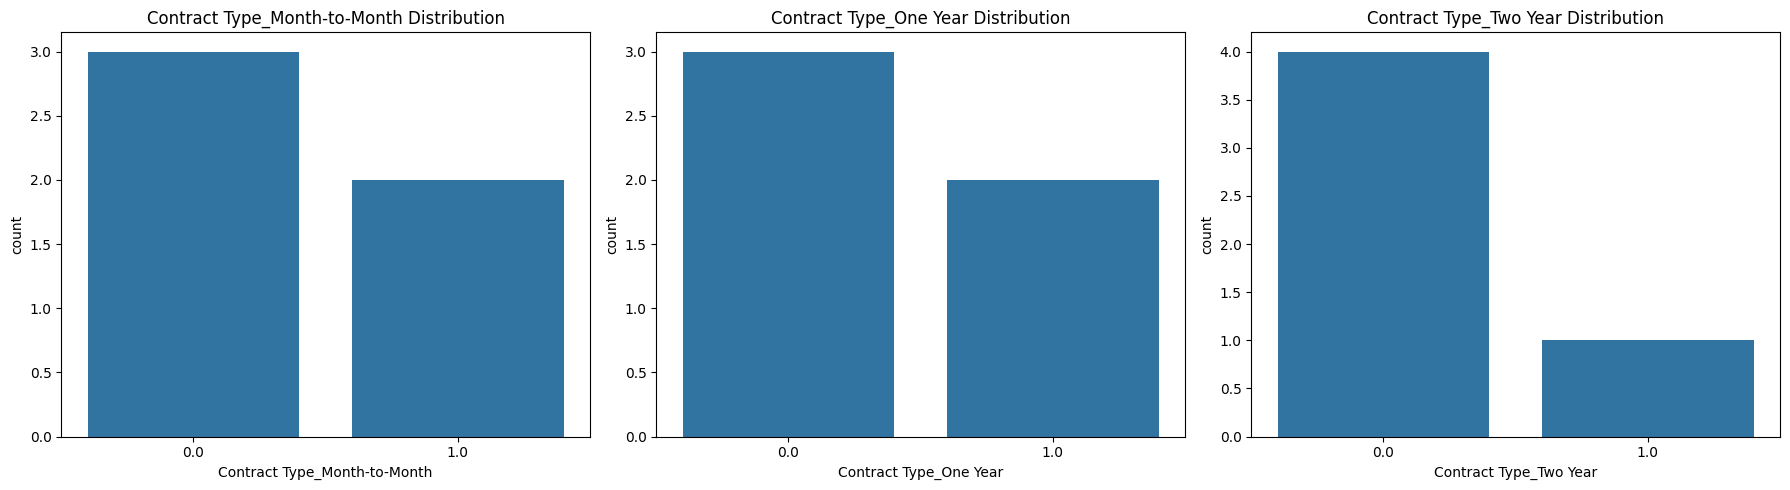

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Sample dataset
data = {
    'Customer ID': [1, 2, 3, 4, 5],
    'Contract Type': ['Month-to-Month', 'One Year', 'Month-to-Month', 'Two Year', 'One Year'],
    'Internet Service': ['DSL', 'Fiber Optic', 'DSL', 'Fiber Optic', 'No Internet Service'],
    'Payment Method': ['Electronic Check', 'Mailed Check', 'Bank Transfer', 'Credit Card', 'Electronic Check'],
}

df = pd.DataFrame(data)

# Plot distribution of original 'Contract Type' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract Type', data=df).set_title('Contract Type Distribution')
plt.show()

# Initialize the OneHotEncoder for 'Contract Type' without dropping any category
one_hot_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the 'Contract Type' column
encoded_columns = one_hot_encoder.fit_transform(df[['Contract Type']])

# Create a new DataFrame with the one-hot encoded columns for 'Contract Type'
encoded_df = pd.DataFrame(encoded_columns, columns=one_hot_encoder.get_feature_names_out(['Contract Type']))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

# Dropping the original 'Contract Type' column as it is now encoded
df_encoded = df_encoded.drop(['Contract Type'], axis=1)

print(df_encoded)

# Plot distribution of encoded 'Contract Type' columns
encoded_cols = encoded_df.columns

fig, axes = plt.subplots(1, len(encoded_cols), figsize=(6 * len(encoded_cols), 5))
for i, col in enumerate(encoded_cols):
    sns.countplot(ax=axes[i], x=encoded_df[col]).set_title(f'{col} Distribution')
plt.tight_layout()
plt.show()

Target Encoding

In [6]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 803.3 kB/s eta 0:00:00


Column Explanations:
1. Store Type: The type of store (categorical variable with values 'Type A', 'Type B', 'Type C', 'Type D').
2. Number of Employees: The number of employees working at the store (integer variable).
3. Advertising Budget: The budget allocated for advertising by the store (continuous variable in dollars).
4. Daily Sales: The sales made by the store in a day (target variable in dollars).

X_train (original):
    Store Type  Number of Employees  Advertising Budget
29      Type D                   37        43562.535230
535     Type B                   12         1940.421564
695     Type D                   14        47945.600526
557     Type B                   23        19418.525972
836     Type C                   27        35683.919764

X_train_encoded:
       Store Type  Number of Employees  Advertising Budget
29   10025.134200                   37        43562.535230
535  10190.055174                   12         1940.421564
695  10025.134200                   14  

<ipython-input-7-7cd25fad4127>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, x='Store Type', palette="viridis")


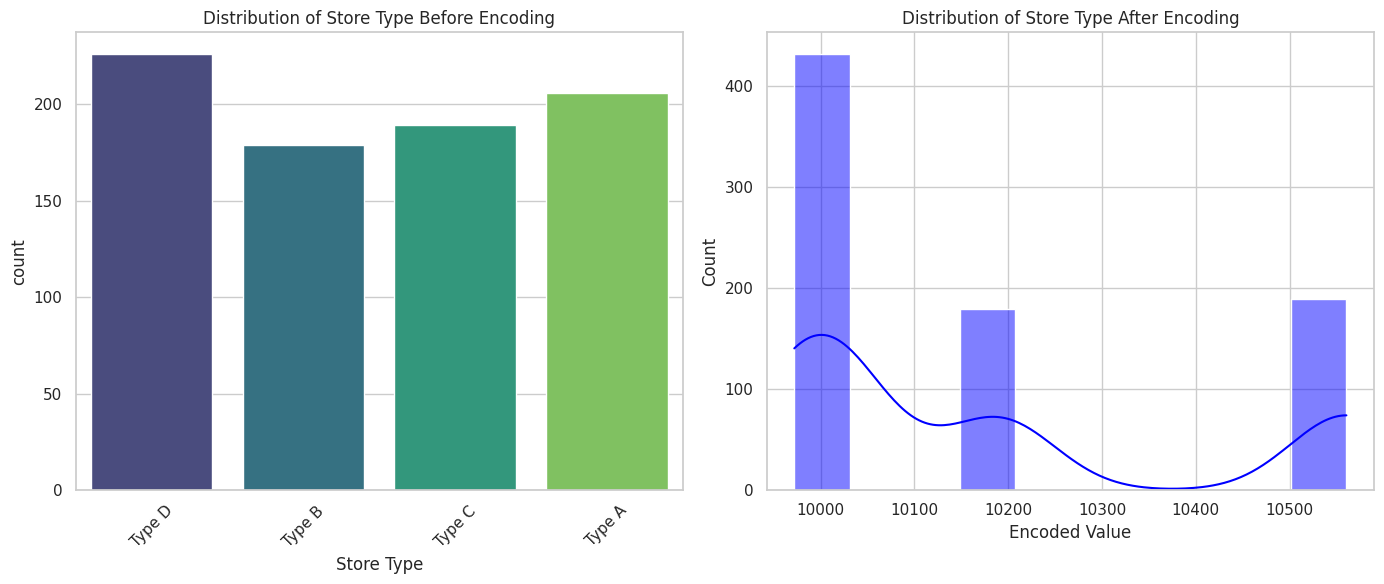


Mean Squared Error: 37764006.60
Root Mean Squared Error: 6145.24
Baseline Mean Squared Error: 31315200.84

The model's MSE is higher than the baseline MSE, indicating the model is not performing well.
Consider the following improvements:
1. Feature Engineering: Create new features or transform existing ones.
2. Model Tuning: Experiment with different hyperparameters or algorithms.
3. Data Quality: Check for data quality issues like missing values or outliers.
4. Additional Data: Collect more data or use additional relevant features.

Mean Squared Error after improvements: 34734964.53


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor

# Set seaborn style
sns.set(style="whitegrid")

# Create a synthetic dataset
np.random.seed(42)

# Sample size
n_samples = 1000

# Generate random data
data = {
    'Store Type': np.random.choice(['Type A', 'Type B', 'Type C', 'Type D'], size=n_samples),
    'Number of Employees': np.random.randint(5, 50, size=n_samples),
    'Advertising Budget': np.random.uniform(1000, 50000, size=n_samples),
    'Daily Sales': np.random.uniform(500, 20000, size=n_samples)
}

df = pd.DataFrame(data)

# Column explanations
print("Column Explanations:")
print("1. Store Type: The type of store (categorical variable with values 'Type A', 'Type B', 'Type C', 'Type D').")
print("2. Number of Employees: The number of employees working at the store (integer variable).")
print("3. Advertising Budget: The budget allocated for advertising by the store (continuous variable in dollars).")
print("4. Daily Sales: The sales made by the store in a day (target variable in dollars).")

# Define the target variable and features
X = df.drop(columns=['Daily Sales'])  # Features
y = df['Daily Sales']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TargetEncoder
target_encoder = TargetEncoder(cols=['Store Type'])

# Fit and transform on the training data
X_train_encoded = target_encoder.fit_transform(X_train, y_train)

# Transform the test data
X_test_encoded = target_encoder.transform(X_test)

# Print X_train and X_train_encoded to show the difference
print("\nX_train (original):")
print(X_train.head())
print("\nX_train_encoded:")
print(X_train_encoded.head())

# Plot distribution of 'Store Type' before and after encoding
plt.figure(figsize=(14, 6))

# Plot original 'Store Type' distribution
plt.subplot(1, 2, 1)
sns.countplot(data=X_train, x='Store Type', palette="viridis")
plt.title('Distribution of Store Type Before Encoding')
plt.xticks(rotation=45)

# Plot encoded 'Store Type' distribution
encoded_col_name = 'Store Type'
plt.subplot(1, 2, 2)
sns.histplot(X_train_encoded[encoded_col_name], kde=True, bins=10, color="blue")
plt.title('Distribution of Store Type After Encoding')
plt.xlabel('Encoded Value')

plt.tight_layout()
plt.show()

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_encoded, y_train)

# Make predictions
y_pred = model.predict(X_test_encoded)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.2f}")

# Calculate RMSE
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse:.2f}")

# Calculate baseline MSE using mean predictor
baseline_pred = [y_train.mean()] * len(y_test)
baseline_mse = mean_squared_error(y_test, baseline_pred)
print(f"Baseline Mean Squared Error: {baseline_mse:.2f}")

# Analyze the situation and potential improvements
if mse > baseline_mse:
    print("\nThe model's MSE is higher than the baseline MSE, indicating the model is not performing well.")
    print("Consider the following improvements:")
    print("1. Feature Engineering: Create new features or transform existing ones.")
    print("2. Model Tuning: Experiment with different hyperparameters or algorithms.")
    print("3. Data Quality: Check for data quality issues like missing values or outliers.")
    print("4. Additional Data: Collect more data or use additional relevant features.")
else:
    print("\nThe model is performing better than the baseline.")

# Example of adding a new feature and tuning the model
X['Employees to Budget Ratio'] = X['Number of Employees'] / X['Advertising Budget']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_encoded = target_encoder.fit_transform(X_train, y_train)
X_test_encoded = target_encoder.transform(X_test)
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error after improvements: {mse:.2f}")

Frequency Encoding

Sample Dataset:
   Customer ID Product Category  Total Purchases
0            1      Electronics                5
1            2         Clothing                2
2            3      Electronics                3
3            4            Books                8
4            5            Books                7
5            6         Clothing                4
6            7      Electronics                2
7            8            Books                5
8            9         Clothing                1
9           10            Books                6


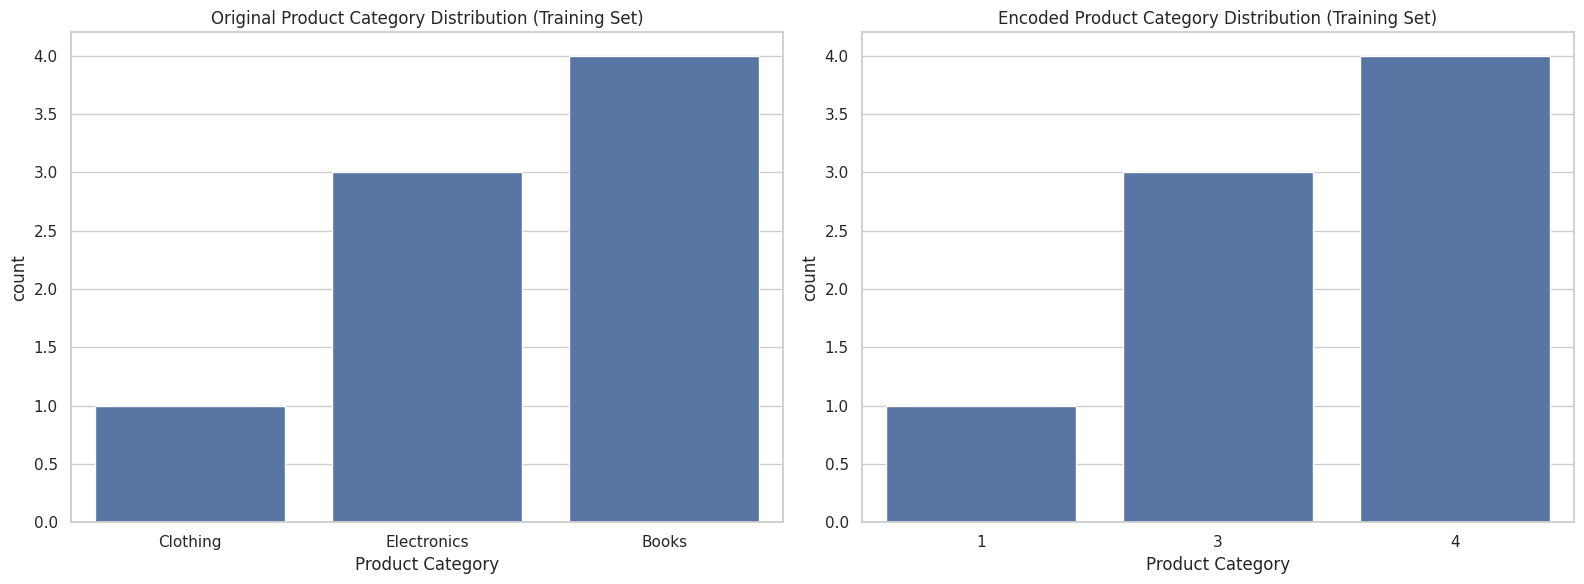


Encoded Training Dataset:
   Customer ID  Product Category  Total Purchases
5            6                 1                4
0            1                 3                5
7            8                 4                5
2            3                 3                3
9           10                 4                6

Encoded Testing Dataset:
   Customer ID  Product Category  Total Purchases
8            9                 1                1
1            2                 1                2


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from category_encoders import CountEncoder  # Ensure you have this library installed

# Create a sample dataset
data = {
    'Customer ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Product Category': ['Electronics', 'Clothing', 'Electronics', 'Books', 'Books', 'Clothing', 'Electronics', 'Books', 'Clothing', 'Books'],
    'Total Purchases': [5, 2, 3, 8, 7, 4, 2, 5, 1, 6]
}

df = pd.DataFrame(data)

# Display the sample dataset
print("Sample Dataset:")
print(df)

# Define the features
X = df[['Customer ID', 'Product Category', 'Total Purchases']]

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Initialize the CountEncoder for 'Product Category'
count_encoder = CountEncoder(cols=['Product Category'])

# Fit and transform the training data
X_train_encoded = count_encoder.fit_transform(X_train)

# Transform the test data using the same encoder
X_test_encoded = count_encoder.transform(X_test)

# Plot the distribution of the original and encoded 'Product Category' in the training set
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Original 'Product Category' distribution
sns.countplot(ax=axes[0], x='Product Category', data=X_train).set_title('Original Product Category Distribution (Training Set)')

# Encoded 'Product Category' distribution
sns.countplot(ax=axes[1], x='Product Category', data=X_train_encoded).set_title('Encoded Product Category Distribution (Training Set)')

plt.tight_layout()
plt.show()

# Display the encoded training dataset
print("\nEncoded Training Dataset:")
print(X_train_encoded.head())

# Display the encoded testing dataset
print("\nEncoded Testing Dataset:")
print(X_test_encoded.head())

Binary Encoding

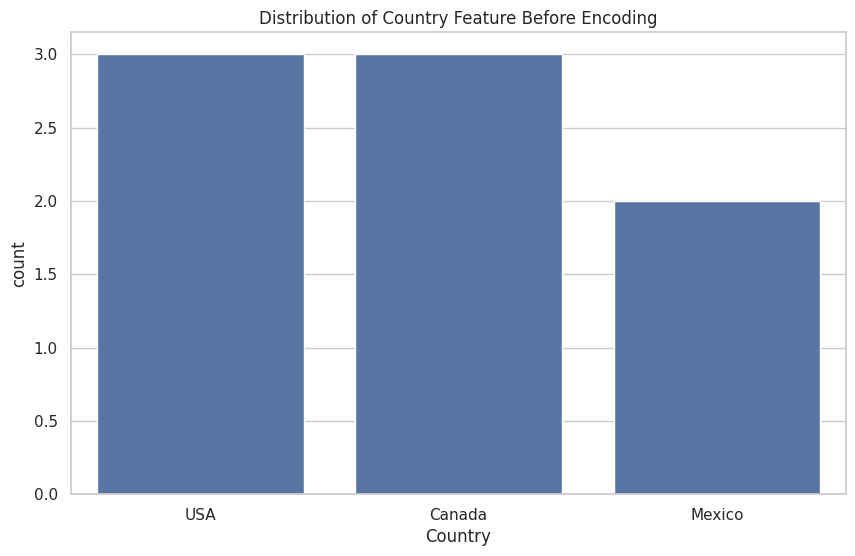

   Country_0  Country_1  Age  Income  Subscription
0          0          1   25   50000             1
1          1          0   30   60000             0
2          0          1   35   70000             1
3          1          0   40   80000             0
4          1          1   45   90000             1
5          0          1   50  100000             0
6          1          1   55  110000             1
7          1          0   60  120000             0


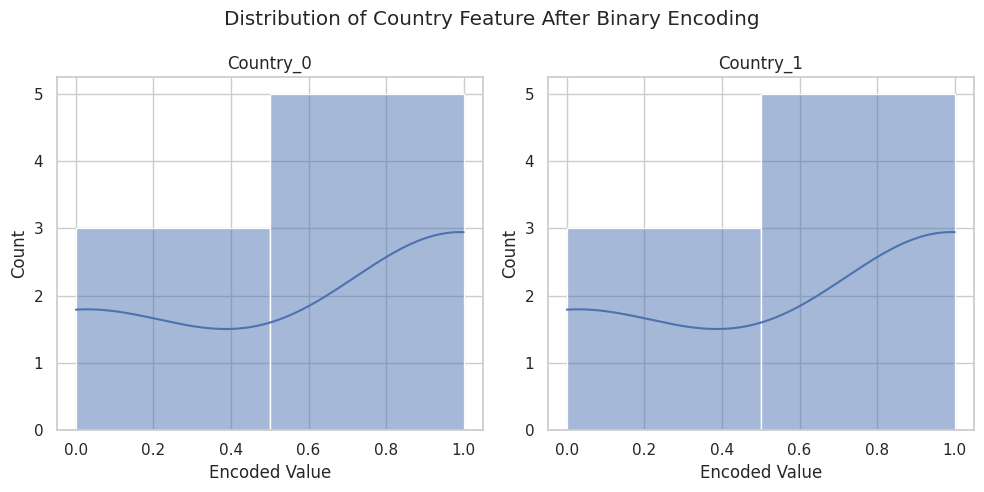

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import BinaryEncoder

# Sample data
data = {
    'Country': ['USA', 'Canada', 'USA', 'Canada', 'Mexico', 'USA', 'Mexico', 'Canada'],
    'Age': [25, 30, 35, 40, 45, 50, 55, 60],
    'Income': [50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000],
    'Subscription': [1, 0, 1, 0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)

# Plot the distribution of the 'Country' feature before encoding
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', data=df)
plt.title('Distribution of Country Feature Before Encoding')
plt.show()

# Apply binary encoding to the 'Country' feature
encoder = BinaryEncoder(cols=['Country'])
df_encoded = encoder.fit_transform(df)

# Display the encoded dataframe
print(df_encoded)

# Plot the distribution of the binary encoded features
encoded_cols = [col for col in df_encoded.columns if 'Country' in col]
n_cols = len(encoded_cols)

fig, axes = plt.subplots(1, n_cols, figsize=(5*n_cols, 5))
fig.suptitle('Distribution of Country Feature After Binary Encoding')

for i, col in enumerate(encoded_cols):
    sns.histplot(df_encoded[col], kde=True, ax=axes[i], bins=2)
    axes[i].set_title(col)
    axes[i].set_xlabel('Encoded Value')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()